<a href="https://colab.research.google.com/github/kariukidan/Sigma_academy/blob/main/dataAnalysisProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import *

data = pd.read_csv('/content/euro2024_players.csv')

In [ ]:
data.head()

,Name,Position,Age,Club,Height,Foot,Caps,Goals,MarketValue,Country
0,Marc-André ter Stegen,Goalkeeper,32,FC Barcelona,187,right,40,0,28000000,Germany
1,Manuel Neuer,Goalkeeper,38,Bayern Munich,193,right,119,0,4000000,Germany
2,Oliver Baumann,Goalkeeper,34,TSG 1899 Hoffenheim,187,right,0,0,3000000,Germany
3,Nico Schlotterbeck,Centre-Back,24,Borussia Dortmund,191,left,12,0,40000000,Germany
4,Jonathan Tah,Centre-Back,28,Bayer 04 Leverkusen,195,right,25,0,30000000,Germany


In [ ]:
data.describe()

,Age,Height,Caps,Goals,MarketValue
count,623.000000,623.000000,623.000000,623.000000,6.230000e+02
mean,27.040128,184.181380,30.338684,4.152488,1.840903e+07
std,4.124275,6.569258,30.987902,10.086803,2.426195e+07
min,16.000000,167.000000,0.000000,0.000000,5.000000e+04
25%,24.000000,180.000000,7.000000,0.000000,2.900000e+06
50%,27.000000,185.000000,21.000000,1.000000,9.000000e+06
75%,30.000000,189.000000,42.000000,4.000000,2.500000e+07
max,41.000000,202.000000,206.000000,128.000000,1.800000e+08


In [ ]:
data.duplicated().sum()

0

In [ ]:
data.isnull().sum()

Name           0
Position       0
Age            0
Club           0
Height         0
Foot           3
Caps           0
Goals          0
MarketValue    0
Country        0
dtype: int64

In [ ]:
data.keys()

Index(['Name', 'Position', 'Age', 'Club', 'Height', 'Foot', 'Caps', 'Goals',
       'MarketValue', 'Country'],
      dtype='object')

In [ ]:
# Calculate number of player from each club
player_per_club = data.groupby('Club').size().sort_values(ascending=False)
print(player_per_club)

Club
Inter Milan            13
Manchester City        13
FC Barcelona           12
Real Madrid            12
Paris Saint-Germain    12
                       ..
LASK                    1
LOSC Lille              1
Le Havre AC             1
Leeds United            1
Újpest FC               1
Length: 219, dtype: int64


In [ ]:
print(player_per_club.head(15))

Club
Inter Milan            13
Manchester City        13
FC Barcelona           12
Real Madrid            12
Paris Saint-Germain    12
Bayern Munich          11
RB Leipzig             11
Arsenal FC             10
Bayer 04 Leverkusen    10
SK Slavia Prague        9
AS Roma                 9
Juventus FC             9
Liverpool FC            9
Bologna FC 1909         8
Manchester United       8
dtype: int64


In [ ]:
#count players preferred foot
preferred_foot = data.groupby('Foot').size().sort_values(ascending=False)
print(preferred_foot)

Foot
right    436
left     150
both      31
-          3
dtype: int64


In [ ]:
#check number of players for each position in the tournament
player_position= data['Position'].value_counts()
print(player_position)

Position
Centre-Back           125
Central Midfield       81
Centre-Forward         77
Goalkeeper             72
Defensive Midfield     50
Attacking Midfield     48
Left Winger            44
Right-Back             43
Right Winger           35
Left-Back              33
Right Midfield          6
Second Striker          5
Left Midfield           4
Name: count, dtype: int64


In [ ]:
#calculate players with more than 50 goals
above_50_goals = data[data['Goals'] > 50]
print(above_50_goals)

                    Name        Position  Age           Club  Height   Foot  \
257           Harry Kane  Centre-Forward   30  Bayern Munich     188  right   
309  Aleksandar Mitrovic  Centre-Forward   29   Al-Hilal SFC     189  right   
335   Robert Lewandowski  Centre-Forward   35   FC Barcelona     185  right   
415       Olivier Giroud  Centre-Forward   37       AC Milan     192   left   
440        Romelu Lukaku  Centre-Forward   31        AS Roma     191   left   
596    Cristiano Ronaldo  Centre-Forward   39    Al-Nassr FC     188  right   

     Caps  Goals  MarketValue   Country  
257    91     63    100000000   England  
309    90     57     28000000    Serbia  
335   149     82     15000000    Poland  
415   132     57      3000000    France  
440   114     83     30000000   Belgium  
596   206    128     15000000  Portugal  


In [ ]:
#calculate average value of players per club
average_value_per_club = data.groupby('Club')['MarketValue'].mean().sort_values(ascending=False)
print(average_value_per_club)

Club
Manchester City            6.353846e+07
Arsenal FC                 5.850000e+07
Paris Saint-Germain        5.483333e+07
Bayern Munich              5.200000e+07
Liverpool FC               4.588889e+07
                               ...     
Union Saint-Gilloise       3.000000e+05
Vejle Boldklub             3.000000e+05
NK Maribor                 3.000000e+05
Grasshopper Club Zurich    2.000000e+05
Dinamo Tbilisi             5.000000e+04
Name: MarketValue, Length: 219, dtype: float64


In [ ]:
#calculate players with the most caps
most_caps = data[data['Caps'] == data['Caps'].max()]
print(most_caps.head(10))

                  Name        Position  Age         Club  Height   Foot  Caps  \
596  Cristiano Ronaldo  Centre-Forward   39  Al-Nassr FC     188  right   206   

     Goals  MarketValue   Country  
596    128     15000000  Portugal  


In [ ]:
#top10 player with most caps
top10_caps = data.nlargest(10, 'Caps')
print(top10_caps)

                   Name          Position  Age                Club  Height  \
596   Cristiano Ronaldo    Centre-Forward   39         Al-Nassr FC     188   
145         Luka Modric  Central Midfield   38         Real Madrid     172   
423      Jan Vertonghen       Centre-Back   37      RSC Anderlecht     189   
335  Robert Lewandowski    Centre-Forward   35        FC Barcelona     185   
577                Pepe       Centre-Back   41            FC Porto     187   
415      Olivier Giroud    Centre-Forward   37            AC Milan     192   
266          Simon Kjær       Centre-Back   35            AC Milan     191   
422         Axel Witsel       Centre-Back   35  Atlético de Madrid     186   
151        Ivan Perisic       Left Winger   35    HNK Hajduk Split     186   
22        Thomas Müller    Second Striker   34       Bayern Munich     185   

      Foot  Caps  Goals  MarketValue   Country  
596  right   206    128     15000000  Portugal  
145  right   174     24      6000000   Croa

In [ ]:
#top10 expensive players
top10_expensive = data.nlargest(10, 'MarketValue')
print(top10_expensive)

                    Name            Position  Age                 Club  \
250      Jude Bellingham  Attacking Midfield   20          Real Madrid   
411        Kylian Mbappé      Centre-Forward   25  Paris Saint-Germain   
254           Phil Foden        Right Winger   24      Manchester City   
255          Bukayo Saka        Right Winger   22           Arsenal FC   
17         Florian Wirtz  Attacking Midfield   21  Bayer 04 Leverkusen   
18         Jamal Musiala  Attacking Midfield   21        Bayern Munich   
115                Rodri  Defensive Midfield   27      Manchester City   
246          Declan Rice  Defensive Midfield   25           Arsenal FC   
257           Harry Kane      Centre-Forward   30        Bayern Munich   
402  Aurélien Tchouaméni  Defensive Midfield   24          Real Madrid   

     Height   Foot  Caps  Goals  MarketValue  Country  
250     186  right    29      3    180000000  England  
411     178  right    78     47    180000000   France  
254     171   lef

In [ ]:
#top10 oldest players
top10_oldest = data.nlargest(10, 'Age')
print(top10_oldest)

                  Name          Position  Age            Club  Height   Foot  \
577               Pepe       Centre-Back   41        FC Porto     187  right   
596  Cristiano Ronaldo    Centre-Forward   39     Al-Nassr FC     188  right   
1         Manuel Neuer        Goalkeeper   38   Bayern Munich     193  right   
114        Jesús Navas        Right-Back   38      Sevilla FC     170  right   
145        Luka Modric  Central Midfield   38     Real Madrid     172  right   
547       Giorgi Loria        Goalkeeper   38  Dinamo Tbilisi     197  right   
262  Kasper Schmeichel        Goalkeeper   37  RSC Anderlecht     189  right   
415     Olivier Giroud    Centre-Forward   37        AC Milan     192   left   
423     Jan Vertonghen       Centre-Back   37  RSC Anderlecht     189   left   
451      Peter Pekarik        Right-Back   37      Hertha BSC     177  right   

     Caps  Goals  MarketValue   Country  
577   136      8       500000  Portugal  
596   206    128     15000000  Port

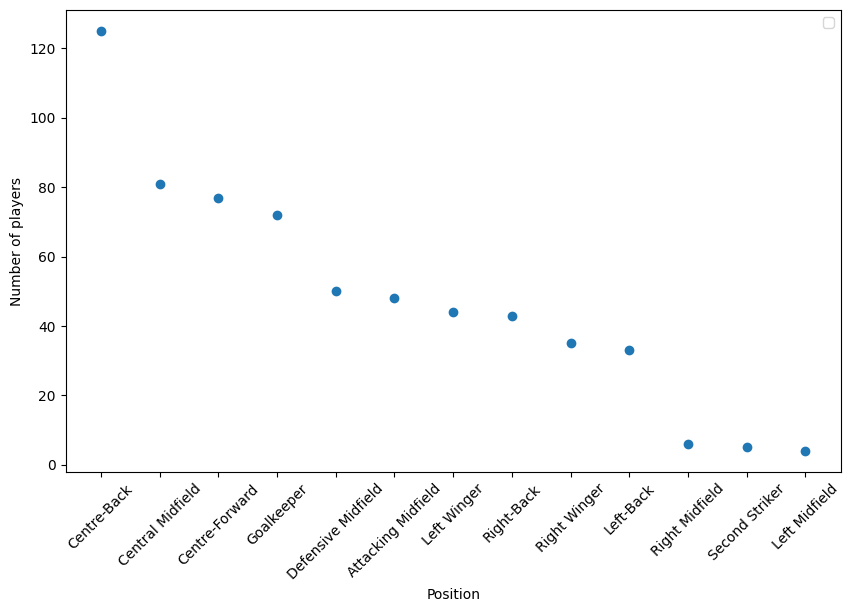

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(player_position.index, player_position.values, alpha= 1)
plt.xlabel('Position')
plt.ylabel('Number of players')
plt.xticks(rotation=45)
plt.legend()
plt.show()

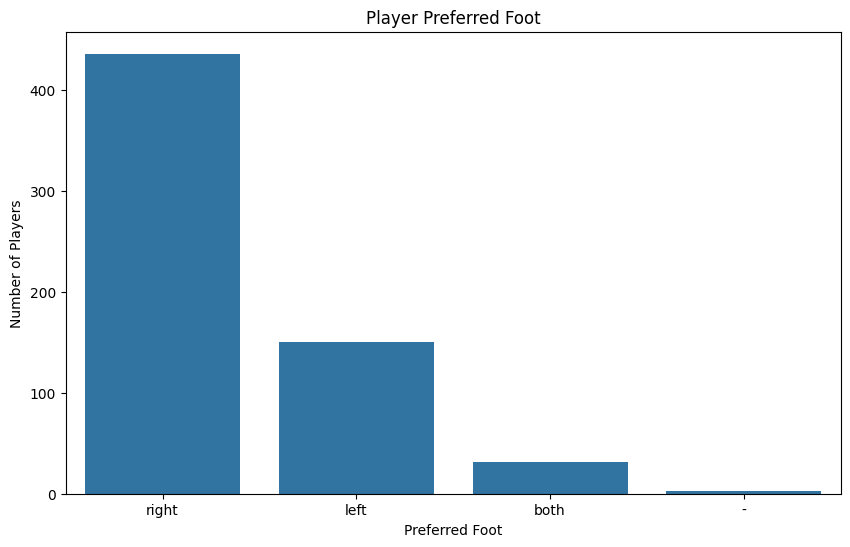

In [ ]:
#Countplot for player preferred foot
plt.figure(figsize=(10, 6))
sns.countplot(x='Foot', data=data)
plt.title('Player Preferred Foot')
plt.xlabel('Preferred Foot')
plt.ylabel('Number of Players')
plt.show()

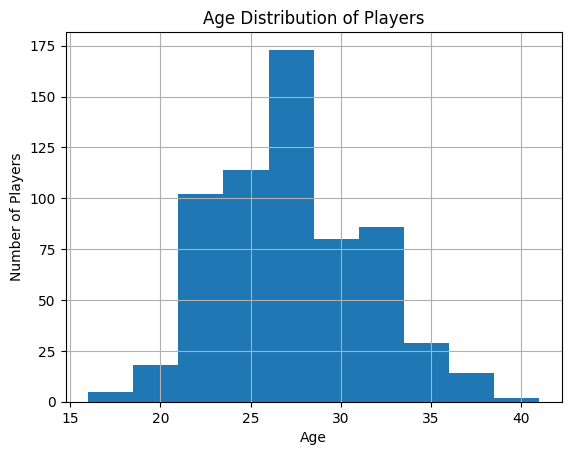

In [ ]:
#show age dIsitribution of the players
data['Age'].hist(bins=10)
plt.title('Age Distribution of Players')
plt.xlabel('Age')
plt.ylabel('Number of Players')
plt.show()

In [ ]:
#test player position height normality

goalkeeper = data[data["Position"] == "Goalkeeper"]

goalkeeper_height_normality = stats.shapiro(goalkeeper['Height'])
print(goalkeeper_height_normality)
if goalkeeper_height_normality.pvalue > 0.05:
    print("The data is normally distributed :Accept hypothesis)")
else:
    print("The data is not normally distributed : reject hypothesis)")

ShapiroResult(statistic=0.976085364818573, pvalue=0.18620741367340088)
The data is normally distributed :Accept hypothesis)


In [ ]:
striker = data[data["Position"] == "Centre-Forward"]

striker_height_normality = stats.shapiro(striker['Height'])
print(striker_height_normality)

if striker_height_normality.pvalue > 0.05:
    print("The data is normally distributed :Accept hypothesis)")
else:
    print("The data is not normally distributed : reject hypothesis)")

ShapiroResult(statistic=0.9772229194641113, pvalue=0.1817895919084549)
The data is normally distributed :Accept hypothesis)


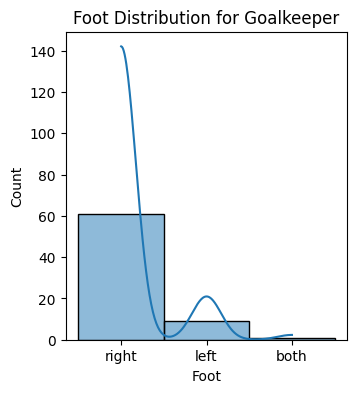

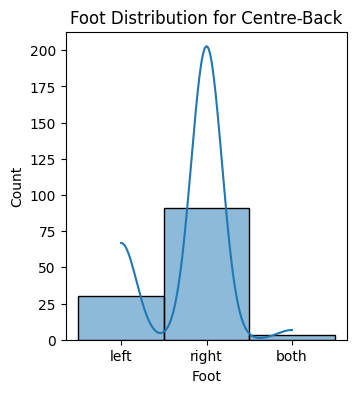

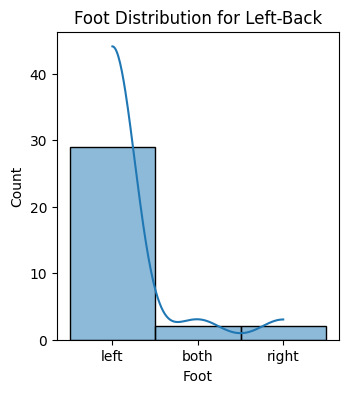

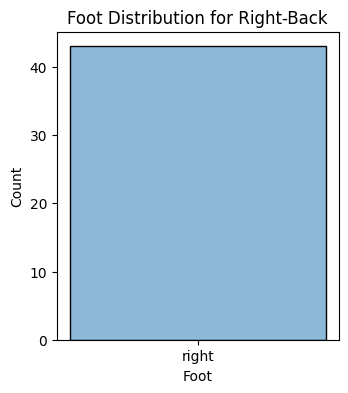

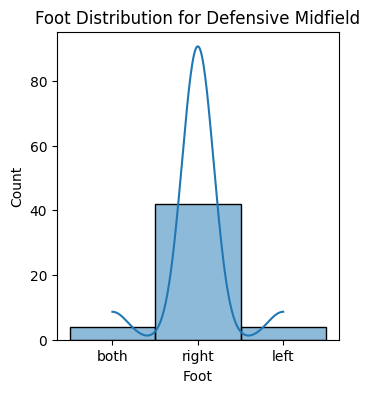

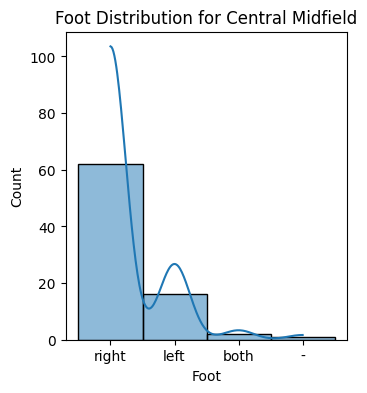

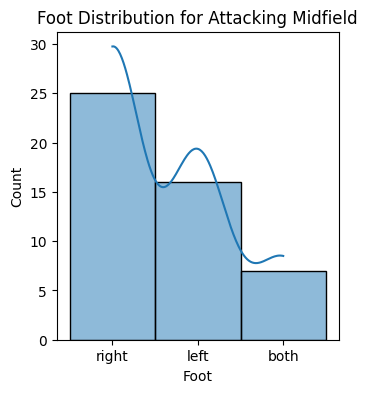

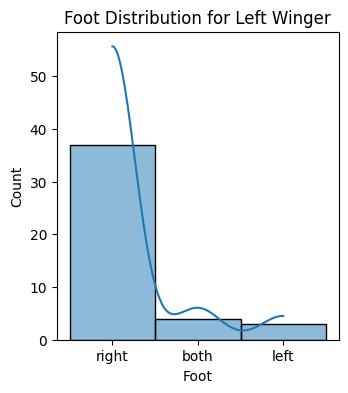

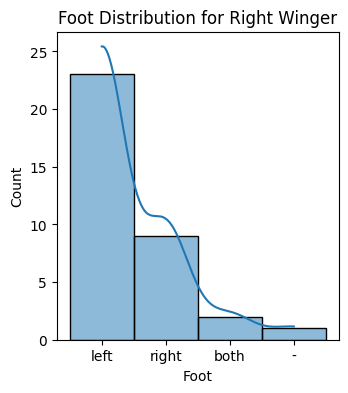

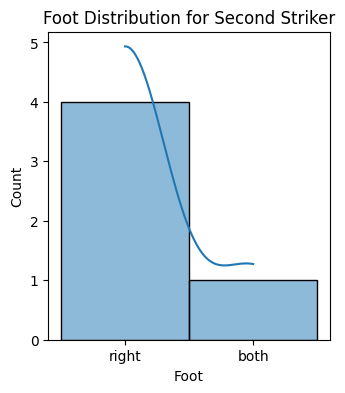

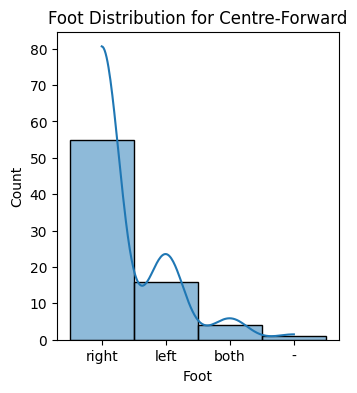

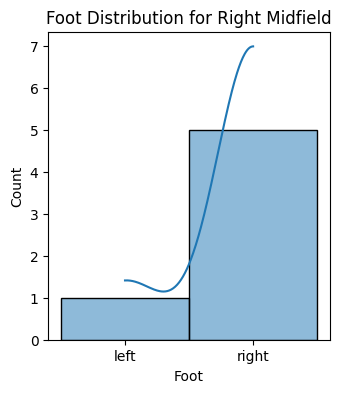

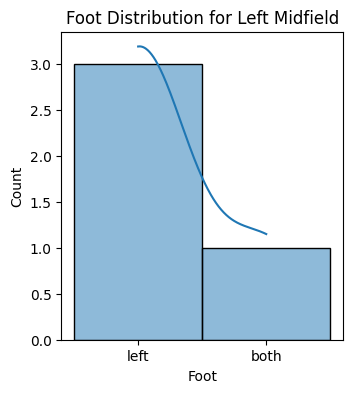

In [ ]:
#dominant foot distibution by position
for position in data['Position'].unique():
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(data[data['Position'] == position]['Foot'], kde=True)
    plt.title(f'Foot Distribution for {position}')

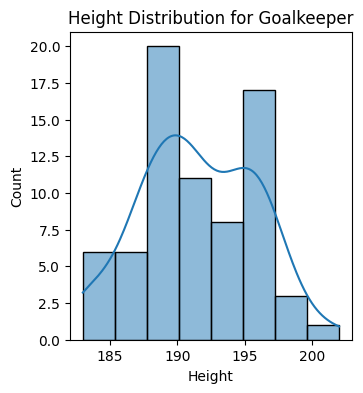

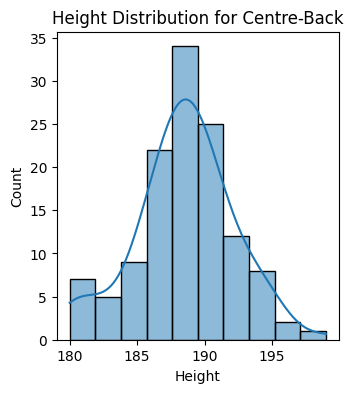

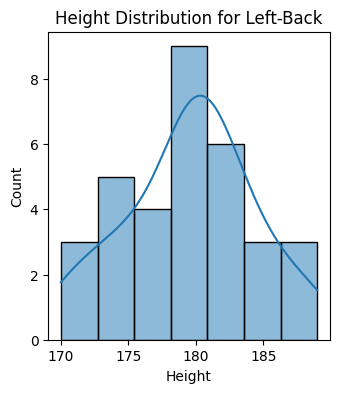

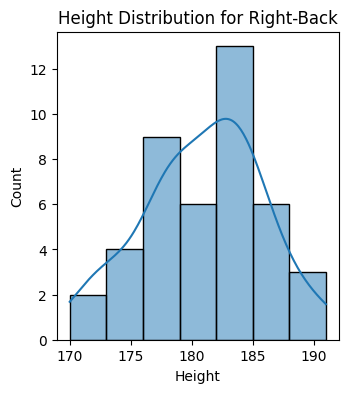

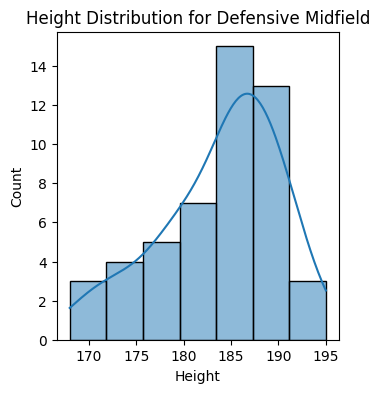

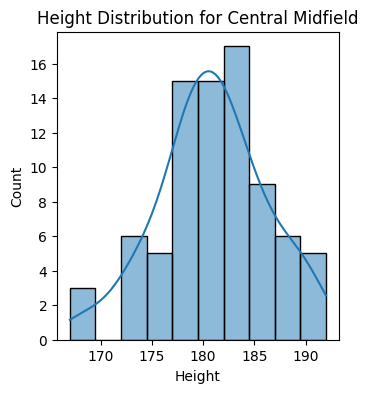

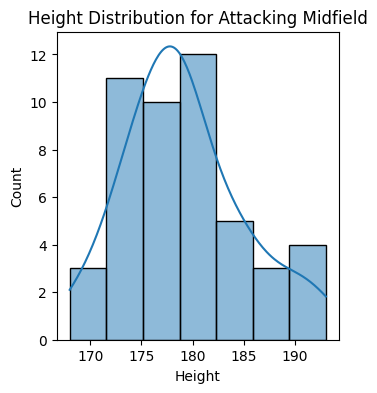

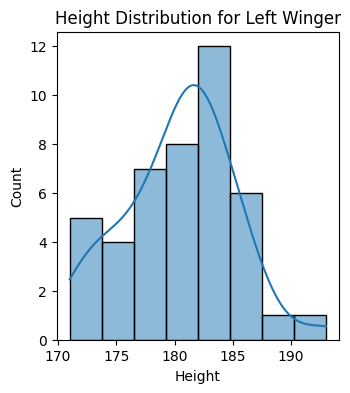

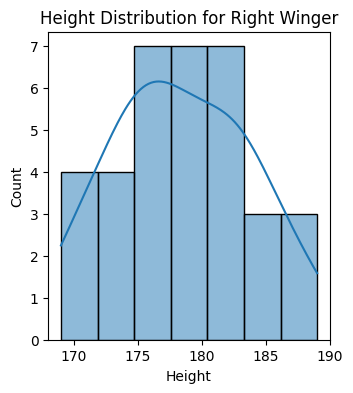

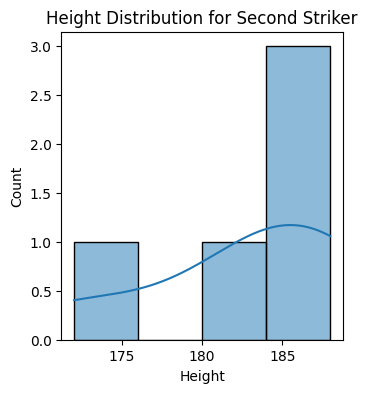

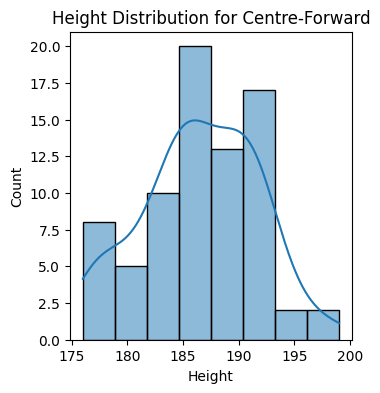

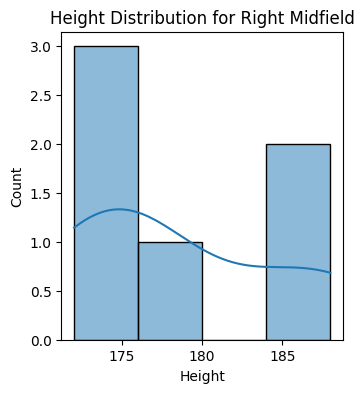

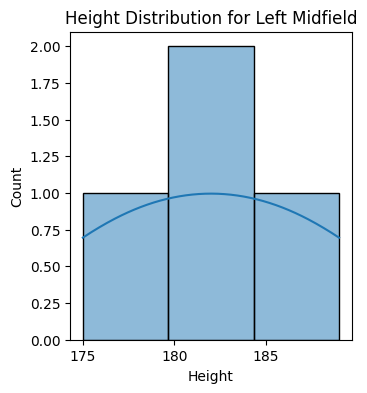

In [ ]:
#heigh distribution per position
for position in data['Position'].unique():
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(data[data['Position'] == position]['Height'], kde=True)
    plt.title(f'Height Distribution for {position}')

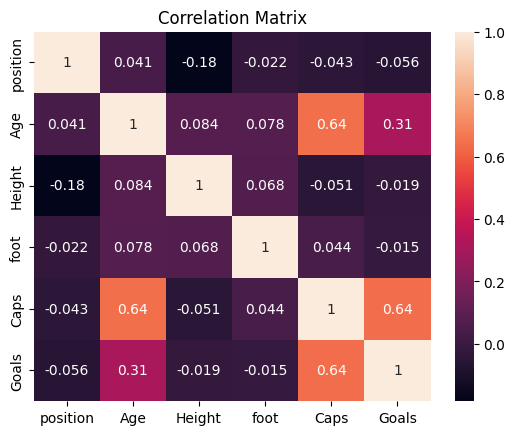

1.0

In [ ]:
#check correlation
#convert position and foot values to numerical value
data['position'] = data['Position'].astype('category').cat.codes
data['foot'] = data['Foot'].astype('category').cat.codes

cr_data = data[['position', 'Age', 'Height', 'foot', 'Caps', 'Goals']]
correlation_matrix = cr_data.corr()

#add heatmap
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()
1.

There is a strong positive relationship between age and caps because older players tend to have played more international matches.
There is also a strong positve relationship between caps and goals because players who have played more international matches will tend to have more goals than those who have played less.
The correlation between Height and goals, foor and goals is very weak